<a href="https://colab.research.google.com/github/gustahps-0712/MachineLearningProjects/blob/main/Desafio_Case_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando Bibliotecas a serem usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importando a base fake_allocation_policies.xlsx

policy_data  = pd.read_excel("/content/fake_allocation_policies.xlsx")
policy_data

,Classe,Conservador,Moderado Conservador,Moderado,Moderado Agressivo,Agressivo
0,Renda Fixa Pós-Fixada,0.70,0.46,0.30,0.15,0.05
1,Renda Fixa Inflação,0.12,0.16,0.24,0.20,0.19
2,Renda Fixa Pré-Fixada,0.05,0.08,0.10,0.11,0.10
3,Renda Variável,0.02,0.04,0.07,0.14,0.20
4,Multimercado,0.09,0.21,0.22,0.30,0.31
5,Alternativos,0.00,0.00,0.00,0.00,0.00
6,Internacional,0.02,0.05,0.07,0.10,0.15
7,Saldo em Conta,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Importando a base fake_position.csv

position_data = pd.read_csv("/content/fake_position.csv")
position_data


,account_code,account_suitability,asset_name,asset_cnpj,class_name,position_value
0,65547,moderado,CDB PRE DU CDB120CAG00,NaN,Renda Fixa PrÃ©-Fixada,133886.2200
1,65547,moderado,CDB PRE DU CDB320A2QHT,NaN,Renda Fixa PrÃ©-Fixada,61127.1703
2,65547,moderado,CDB PRE DU CDB420IBE9D,NaN,Renda Fixa PrÃ©-Fixada,206855.5322
3,65547,moderado,CDB PRE DU CDB321ALNBI,NaN,Renda Fixa PrÃ©-Fixada,47910.6903
4,65547,moderado,LCI PRE 21K00148900,NaN,Renda Fixa PrÃ©-Fixada,71442.6276
...,...,...,...,...,...,...
528,78059,moderado,Saldo em Conta,NaN,Saldo em Conta,0.0000
529,82356,conservador,Saldo em Conta,NaN,Saldo em Conta,0.0000
530,73707,moderado-agressivo,Saldo em Conta,NaN,Saldo em Conta,121.9300
531,20921,agressivo,Saldo em Conta,NaN,Saldo em Conta,3.6500


In [ ]:
# Entendendo o padrão de nomenclatura da coluna class_name do dataset position

display(position_data.groupby("class_name")['class_name',"position_value"].sum())

<ipython-input-229-73ff26b505ce>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(position_data.groupby("class_name")['class_name',"position_value"].sum())
<ipython-input-229-73ff26b505ce>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(position_data.groupby("class_name")['class_name',"position_value"].sum())


,position_value
class_name,
Alternativos,1.157287e+08
Internacional,1.591876e+05
Multimercado,1.362656e+06
Renda Fixa InflaÃ§Ã£o,1.659458e+09
Renda Fixa PrÃ©-Fixada,7.448175e+07
Renda Fixa PÃ³s-Fixada,2.276483e+07
Renda VariÃ¡vel,7.105020e+05
Reserva de Liquidez,4.868853e+06
Saldo em Conta,8.536125e+04


In [ ]:
# Mudança no nome da class_name para realizar o merge corretamente (padronização de nomes)

position_data['class_name'] = position_data['class_name'].replace('Renda Fixa PrÃ©-Fixada','Renda Fixa Pré-Fixada')
position_data['class_name'] = position_data['class_name'].replace('Renda Fixa InflaÃ§Ã£o','Renda Fixa Inflação')
position_data['class_name'] = position_data['class_name'].replace('Renda Fixa PrÃ©-Fixada','Renda Fixa Pré-Fixada')
position_data['class_name'] = position_data['class_name'].replace('Renda Fixa PÃ³s-Fixada','Renda Fixa Pós-Fixada')
position_data['class_name'] = position_data['class_name'].replace('Renda VariÃ¡vel','Renda Variável')




In [ ]:
# Unindo as tabelas policy_data e position_data pelas colunas class_name e Classe (apenas com as colunas em comum (inner))

merged_data = pd.merge(policy_data, position_data, left_on='Classe', right_on='class_name', how='inner')
merged_data

,Classe,Conservador,Moderado Conservador,Moderado,Moderado Agressivo,Agressivo,account_code,account_suitability,asset_name,asset_cnpj,class_name,position_value
0,Renda Fixa Pós-Fixada,0.7,0.46,0.3,0.15,0.05,65547,moderado,LCA 22D01211636,NaN,Renda Fixa Pós-Fixada,121570.1789
1,Renda Fixa Pós-Fixada,0.7,0.46,0.3,0.15,0.05,65547,moderado,LCA 22D00645296,NaN,Renda Fixa Pós-Fixada,74711.1683
2,Renda Fixa Pós-Fixada,0.7,0.46,0.3,0.15,0.05,65547,moderado,LCA 22D00638373,NaN,Renda Fixa Pós-Fixada,3349.0873
3,Renda Fixa Pós-Fixada,0.7,0.46,0.3,0.15,0.05,65547,moderado,CDB FLU CDB1234T4ES,NaN,Renda Fixa Pós-Fixada,99517.8455
4,Renda Fixa Pós-Fixada,0.7,0.46,0.3,0.15,0.05,65547,moderado,LCI 23C00171460,NaN,Renda Fixa Pós-Fixada,31241.7704
...,...,...,...,...,...,...,...,...,...,...,...,...
490,Saldo em Conta,0.0,0.00,0.0,0.00,0.00,78059,moderado,Saldo em Conta,NaN,Saldo em Conta,0.0000
491,Saldo em Conta,0.0,0.00,0.0,0.00,0.00,82356,conservador,Saldo em Conta,NaN,Saldo em Conta,0.0000
492,Saldo em Conta,0.0,0.00,0.0,0.00,0.00,73707,moderado-agressivo,Saldo em Conta,NaN,Saldo em Conta,121.9300
493,Saldo em Conta,0.0,0.00,0.0,0.00,0.00,20921,agressivo,Saldo em Conta,NaN,Saldo em Conta,3.6500


In [ ]:
# Normalização dos dados (colacando os dados na mesma escala)

merged_data['position_value'] = merged_data['position_value']-(merged_data['position_value'].min())/(merged_data['position_value'].max()-merged_data['position_value'].min())

merged_data['position_value']

0      1.215702e+05
1      7.471117e+04
2      3.349087e+03
3      9.951785e+04
4      3.124177e+04
           ...     
490    6.319832e-07
491    6.319832e-07
492    1.219300e+02
493    3.650001e+00
494    6.319832e-07
Name: position_value, Length: 495, dtype: float64

In [ ]:
# Calcular a aderência das contas à política de investimentos usando a distância euclidiana

merged_data['dist_euclidean'] = np.sqrt(
    (merged_data['position_value'] - merged_data['Conservador'])**2 +
    (merged_data['position_value'] - merged_data['Moderado Conservador'])**2 +
    (merged_data['position_value'] - merged_data['Moderado'])**2 +
    (merged_data['position_value'] - merged_data['Moderado Agressivo'])**2 +
    (merged_data['position_value'] - merged_data['Agressivo'])**2
)



In [ ]:
# Agrupar os dados por conta e calcular a aderência média para cada uma

aderencia= merged_data.groupby('account_code')['dist_euclidean'].mean().reset_index()

display(aderencia)

,account_code,dist_euclidean
0,18073,5.427807e+06
1,20921,3.911651e+03
2,2429,2.508373e+07
3,32263,3.636702e+07
4,32449,1.227798e+05
5,45848,7.999491e+03
6,46168,1.814836e+04
7,46744,2.651142e+03
8,47497,3.034395e+04
9,49232,3.267323e+05


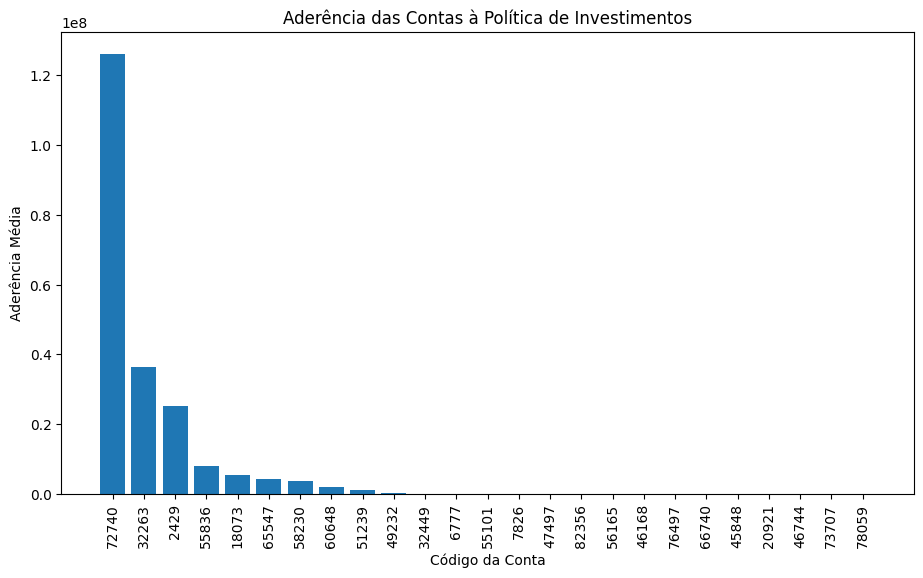

In [ ]:
# Filtrar os dados sem valores nulos na coluna "dist_euclidean"
aderencia_filtrada = aderencia.dropna(subset=['dist_euclidean'])

# Ordenar os dados pela aderência média em ordem decrescente
aderencia_ordenada = aderencia_filtrada.sort_values(by='dist_euclidean', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(11, 6))
plt.bar(aderencia_ordenada['account_code'], aderencia_ordenada['dist_euclidean'])
plt.xlabel('Código da Conta')
plt.ylabel('Aderência Média')
plt.title('Aderência das Contas à Política de Investimentos')

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()


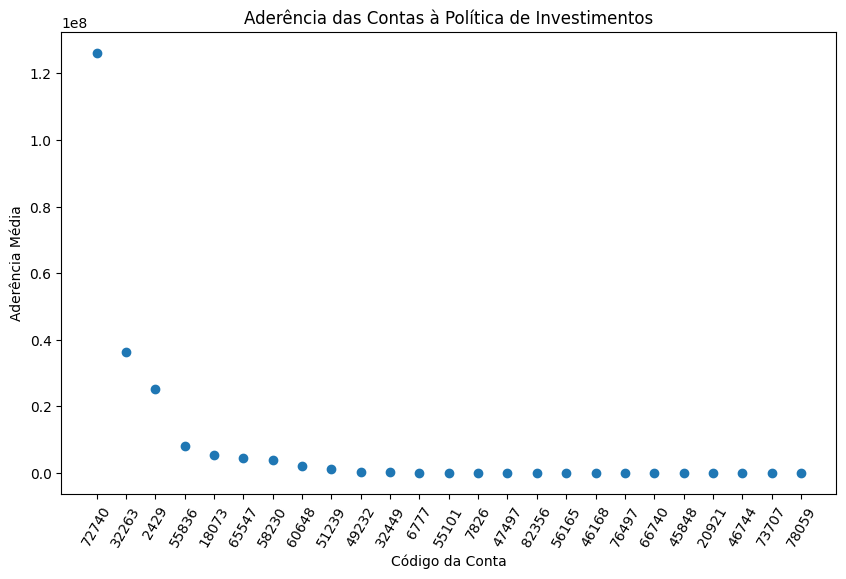

In [ ]:
# Configurar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(aderencia_ordenada['account_code'], aderencia_ordenada['dist_euclidean'])
plt.xlabel('Código da Conta')
plt.ylabel('Aderência Média')
plt.title('Aderência das Contas à Política de Investimentos')

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=60)

# Exibir o gráfico
plt.show()

In [ ]:
# Calculando a política mais desrespeitada

politica_desrespeitada = merged_data.groupby('class_name')['dist_euclidean'].mean().reset_index()
indice_maximo = politica_desrespeitada['dist_euclidean'].idxmax()
classe_maxima = politica_desrespeitada.loc[indice_maximo,'class_name']
print(f' A política mais desrespeitada é a {classe_maxima}')


 A política mais desrespeitada é a Renda Fixa Inflação


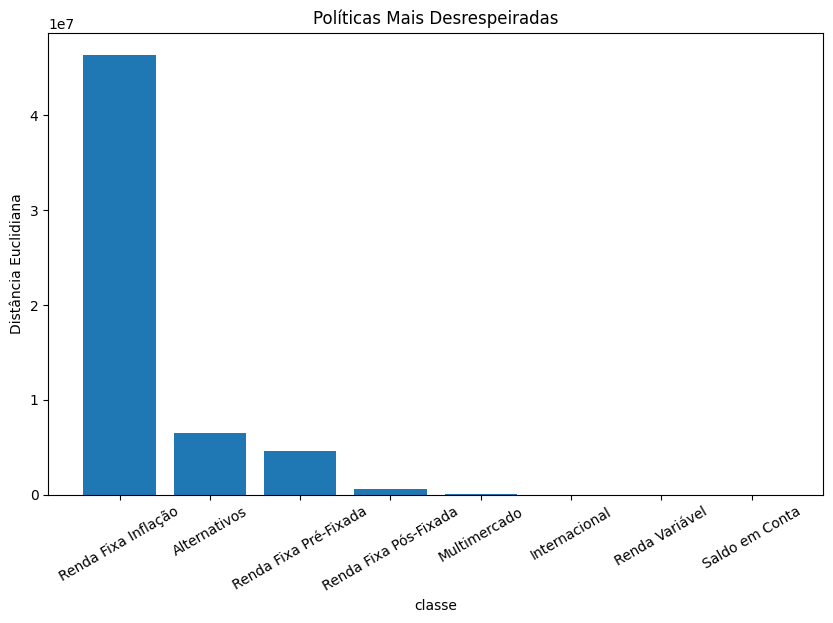

In [ ]:
# Gráfico pala a classe com a política mais desrespeitada

#Ordenação em ordem decrescente das classes segundo a distancia euclidiana
politica_ordenada = politica_desrespeitada.sort_values(by='dist_euclidean',ascending=False)

#Tamanho da Figura
plt.figure(figsize=(10,6))

plt.bar(politica_ordenada['class_name'],politica_ordenada['dist_euclidean'])

plt.xticks(rotation=30)

plt.xlabel('classe')
plt.ylabel('Distância Euclidiana')
plt.title('Políticas Mais Desrespeiradas')
plt.show()



In [ ]:
import sqlite3